### *Project Biodiversity in National Parks*


### *Goal of the project*

#### *The aim of this project is to interpret National Park Service data on endangered species in different parks.*
1. Analysis of data on the conservation status of these species
2. Data cleansing
3. Data visualization
4. Question and answer phase

#### *Data : For this project, we will interpret National Park Service data on endangered species in different parks.*

#### *Analyse :In our analysis, we will use the knowledge acquired so far in the course, but also and especially the following:*
* Visualisation of data
* Communication of data science results

### *Importing the libraries used in the project*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


### *Loading datas with pandas' method read_csv*

In [49]:
#species_info.csv - contains data about different species and their conservation status
df1 = pd.read_csv("species_info.csv")
#Display of the first fifteen lines of the dataframe
df1.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [121]:
#observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.
df2 = pd.read_csv("observations.csv")
#Display of the first fifteen lines of the dataframe
print(df2.head())
df1_df2 = pd.merge(df1,df2)


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [119]:
print("DataFrame fusionné")
print(df1_df2.head())
df1_df2.info()

DataFrame fusionné
  category scientific_name common_names conservation_status  \
0   Mammal   Canis latrans       Coyote  Species of Concern   
1   Mammal   Canis latrans       Coyote  Species of Concern   
2   Mammal   Canis latrans       Coyote  Species of Concern   
3   Mammal   Canis latrans       Coyote  Species of Concern   
4   Mammal     Canis lupus    Gray Wolf          Endangered   

                             park_name  observations  
0                  Bryce National Park            85  
1            Yellowstone National Park           206  
2  Great Smoky Mountains National Park            68  
3               Yosemite National Park            99  
4               Yosemite National Park            35  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             880 non-null    object
 1   scientific_name 

### *Information on the data*


In [18]:
#Dataframe1
df1.info()
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 7 to 5676
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             191 non-null    object
 1   scientific_name      191 non-null    object
 2   common_names         191 non-null    object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 7.5+ KB
(191, 4)


In [21]:
#Dataframe2
df2.info()
print(df2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
(23296, 3)


### *Explore and Explain Data*

#### *Summary statistics*

#### *species_info.csv - contains data about different species and their conservation status*

In [38]:
#Deletion of NaN values
df1.dropna(inplace = True)
#category column
print("Proportion of category")
print(df1.loc[:,"category"].value_counts(normalize = True))
print("\nProportion of scientific_name")
#scientific_name column
print(df1.loc[:,"scientific_name"].value_counts(normalize = True))
#common_names column
print("\nProportion of common_names")
print(df1.loc[:,"common_names"].value_counts(normalize = True))
print("\nProportion of conservation_status")
print(df1.loc[:,"conservation_status"].value_counts(normalize = True)
)

Proportion of category
Bird                 0.413613
Vascular Plant       0.240838
Mammal               0.198953
Fish                 0.057592
Amphibian            0.036649
Nonvascular Plant    0.026178
Reptile              0.026178
Name: category, dtype: float64

Proportion of scientific_name
Canis lupus              0.015707
Myotis lucifugus         0.015707
Gavia immer              0.010471
Riparia riparia          0.010471
Nycticorax nycticorax    0.010471
                           ...   
Myotis volans            0.005236
Bassariscus astutus      0.005236
Grus americana           0.005236
Bazzania nudicaulis      0.005236
Stellula calliope        0.005236
Name: scientific_name, Length: 179, dtype: float64

Proportion of common_names
Gray Wolf, Wolf                                      0.010471
Yellow Rail                                          0.005236
Fringed Myotis, Fringed Myotis                       0.005236
Bazzania                                             0.005236
Yell

### *Data visualization*

#### *With the visualization we will answer the following questions:*
1. Are certain types of species more likely to be endangered?
2. Are the differences between species and their conservation status significant?
3. Which species were spotted the most at each park?


#### We will use a bar graph to answer the first question.

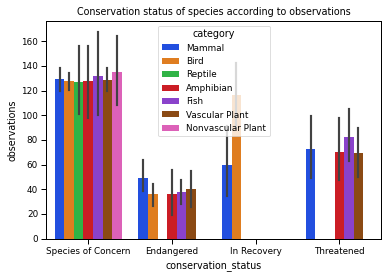

In [131]:
sns.set_context("paper")
sns.barplot(data=df1_df2, x = "conservation_status", y = "observations", hue = "category")
plt.title("Conservation status of species according to observations")
plt.savefig("fig1.png")
plt.show()

In [128]:
df1_df2.groupby("category")["conservation_status"].count().sort_values(ascending = False)

category
Bird                 348
Mammal               232
Vascular Plant       184
Fish                  48
Amphibian             28
Reptile               20
Nonvascular Plant     20
Name: conservation_status, dtype: int64

### Yes, mammals are the most endangered.

### To answer the second question, we will use the chi-square test :
Chi-square test
To test for an association between two categorical variables, we can use a chi-square test. The null hypothesis for a chi-square test is that there is no association between the variables and the alternative hypothesis is that there is an association between the variables. A Chi-Square test can be implemented in Python using the chi2_contingency()function from scipy.stats.

In [89]:
from scipy.stats import chi2_contingency
import math
# create contingency table
ab_contingency = pd.crosstab(df1_df2.category, df1_df2.conservation_status)
 
# run a Chi-Square test
chi2, pval, dof, expected = chi2_contingency(ab_contingency)
print(pval)

2.7594442674479634e-49


### *The p-value obtained is less than 0.5, so the differences between the species and their conservation status are significant.*

#### We will use a bar graph to answer the third question.

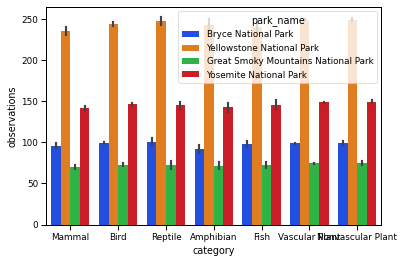

In [132]:
sns.set_context("paper")
sns.barplot(data=df1_df2, x = "category", y = "observations", hue = "park_name")
plt.title("")
plt.savefig("fig2.png")
plt.show()

In [118]:
retour = df1_df2.groupby(["category", "park_name"])["observations"].max().reset_index()
pivoted = retour.pivot(columns = "category", index = "park_name", values = "observations")
pivoted

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,128,130,105,152,135,87,133
Great Smoky Mountains National Park,85,115,87,97,108,110,95
Yellowstone National Park,238,266,253,261,268,245,260
Yosemite National Park,162,178,149,169,142,162,169


### The table above shows the numbers of the most repeated species in each park.

### *Conclusion: In carrying out this project, we have used methods and practical advice from the data science course. This helped us to gain confidence but also to remove any doubts about our ability to carry out a data science project.*